In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

map_path = os.path.expanduser(
        '../maps/map1.txt'
)
mp = []
with open(map_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        l = []
        for i in range(len(line)):
            l.append(line[i])
        mp.append(l)

mp = np.array(mp)


def visualize_map(mp: np.ndarray):
    char_to_int = {
        '#': 1.,
        '*': 1.,
        '.': 0.,
        'A': 0.,
        'B': 0.,
    }
    cp = np.zeros(mp.shape, dtype=np.float32)
    m, n = cp.shape
    for i in range(m):
        for j in range(n):
            cp[i, j] = char_to_int[mp[i, j]]
    return cp


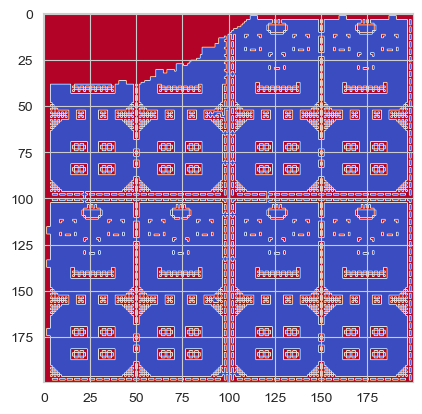

In [2]:
cp = visualize_map(mp)
plt.imshow(cp, cmap='coolwarm')

In [3]:
class Grid:
    def __init__(self, n_window: int, n_min_split: int = 1, n_max_split: int = 3):
        self.n_window = n_window
        self.n_min_split = n_min_split
        self.n_max_split = n_max_split

    def gridify(self, mp: np.ndarray):
        m, n = mp.shape
        self.m, self.n = m, n
        self.mp = mp
        # Split to n_window x n_window
        x_window = m // self.n_window  # Size of a window
        y_window = n // self.n_window  # Size of a window
        self.x_window, self.y_window = x_window, y_window
        # Border
        x_border = m - x_window * self.n_window  # Size of the border
        y_border = n - y_window * self.n_window  # Size of the border
        self.x_border, self.y_border = x_border, y_border
        # Split to windows, the position of the left up of every windows
        self.windows = []
        for i in range(self.n_window):
            for j in range(self.n_window):
                x = i * x_window + x_border // 2
                y = j * y_window + y_border // 2
                self.windows.append((x, y))
        windows_to_split = {}
        for x, y in self.windows:
            obs_rate = self.obs_rate(x, y) * 3
            n_split = int(self.n_max_split * obs_rate)
            if n_split < self.n_min_split:
                n_split = self.n_min_split
            x_split = x_window // n_split
            y_split = y_window // n_split
            x_sizes = [x_split] * n_split
            x_sizes[-1] += x_window - x_split * n_split
            y_sizes = [y_split] * n_split
            y_sizes[-1] += y_window - y_split * n_split
            positions = []
            for i in range(n_split):
                for j in range(n_split):
                    positions.append((x + i * x_split, y + j * y_split))
            windows_to_split[(x, y)] = {
                'n_split'  : n_split,
                'positions': positions,
                'x_sizes'  : x_sizes,
                'y_sizes'  : y_sizes,
            }
        self.windows_to_split = windows_to_split
        return

    def obs_rate(self, x, y):
        count = 0
        for i in range(x, x + self.x_window):
            for j in range(y, y + self.y_window):
                if self.mp[i, j] == '#':
                    count += 1
        return count / (self.x_window * self.y_window)


grid = Grid(3, 2, 12)
grid.gridify(mp)

(-0.5, 199.5, 199.5, -0.5)

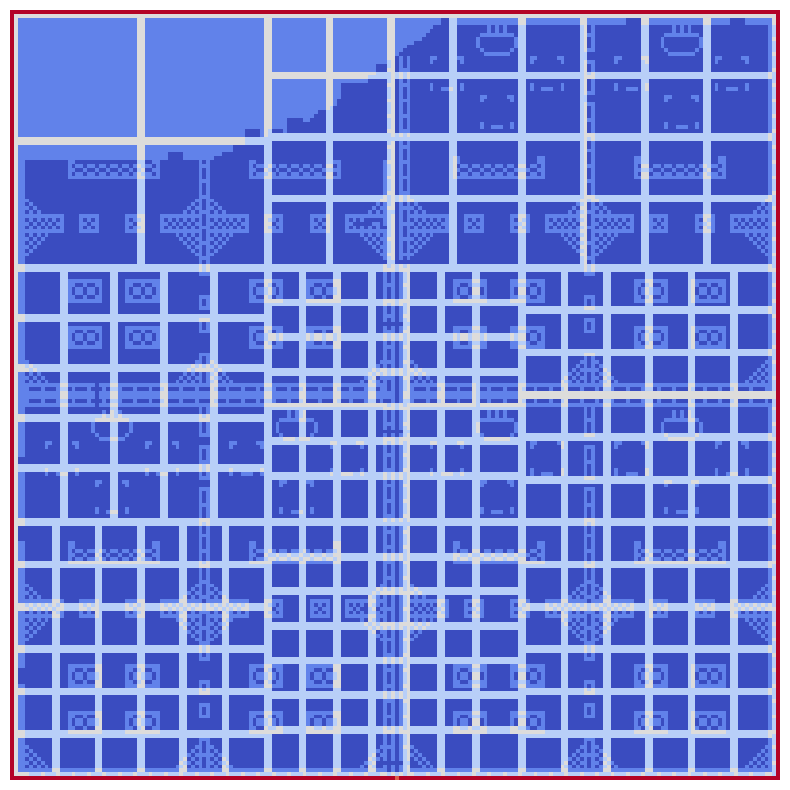

In [4]:
windows = grid.windows
windows_to_split = grid.windows_to_split
cp = visualize_map(mp)

for window in windows:
    split = windows_to_split[window]
    for i in range(split['n_split']):
        for j in range(split['n_split']):
            x, y = split['positions'][i * split['n_split'] + j]
            x_size, y_size = split['x_sizes'][i], split['y_sizes'][j]
            cp[x:x + x_size, y:y + y_size] -= 4
            cp[x + 1:x + x_size - 1, y + 1:y + y_size - 1] -= 3
plt.figure(figsize=(10,10))
plt.imshow(cp, cmap='coolwarm')
plt.axis('off')

In [5]:
def bfs_grid(mp: np.ndarray, start_x, start_y, threshold):
    dx = [-1, 1, 0, 0]
    dy = [0, 0, -1, 1]
    m, n = mp.shape
    queue = [(start_x, start_y)]
    visited = set()
    visited.add((start_x, start_y))
    depth = 0
    grids = []
    while l := len(queue) > 0:
        for i in range(l):
            x, y = queue.pop(0)
            for i in range(4):
                next_pos = (x + dx[i], y + dy[i])
                if not (0 <= next_pos[0] < m and 0 <= next_pos[1] < n): continue
                if not next_pos in visited and mp[next_pos] == '.':
                    queue.append(next_pos)
                    visited.add(next_pos)
                    if random.randint(0, 1000) < threshold:
                        grids.append(next_pos)
        depth += 1
    return grids

(-0.5, 199.5, 199.5, -0.5)

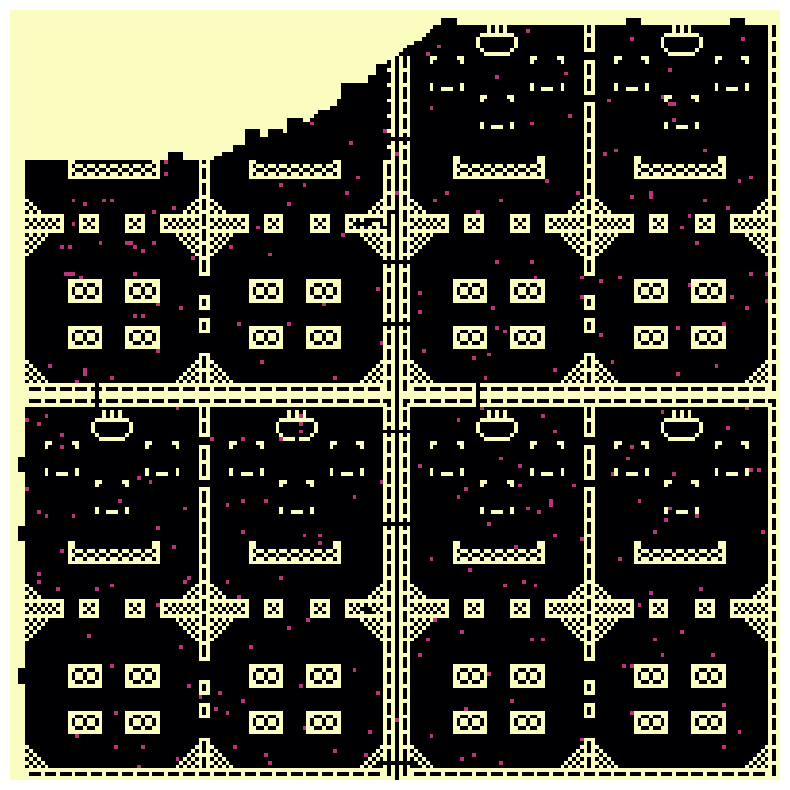

In [6]:
plt.figure(figsize=(10,10))
cp = visualize_map(mp)

grid = bfs_grid(mp, 50, 60, 10)
for x, y in grid:
    cp[x, y] = 0.5
plt.imshow(cp, cmap='magma')
plt.axis('off')